In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

In [32]:
dataset=pd.read_csv("weight-height_kaggle.csv")

In [33]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [34]:
dataset=dataset.drop(['Gender'],axis=1)

In [35]:
dataset.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [36]:
dataset=dataset.rename(columns={'Height':'height','Weight':'weight'})

In [37]:
dataset.head()

,height,weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


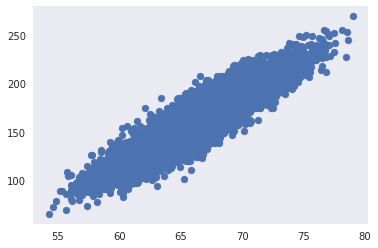

In [38]:
plt.scatter(dataset['height'],dataset['weight'])

In [39]:
dataset.shape
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
from sklearn.metrics import r2_score

In [47]:
r2_score(regressor.predict(X_test),y_test)

0.8330769864376221

In [48]:
r2_score(y_test,regressor.predict(X_test))

0.8581952493935256

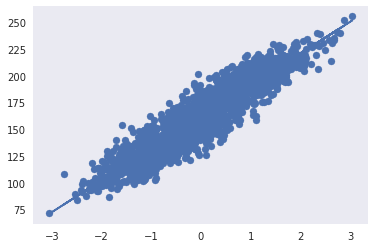

In [16]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test))

In [17]:
regressor.coef_

array([29.66783469])

In [18]:
regressor.intercept_

161.54396403749368

In [19]:
from scipy.stats import pearsonr

In [53]:
a=pearsonr(dataset['height'],dataset['weight'])
a[0]**2

0.8551742120609959

In [81]:
#artificial neural network
from keras.models import Sequential

In [82]:
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [83]:
regressor=Sequential()

In [84]:
regressor.add(Dense(output_dim=1,input_dim=1))

/home/srinivas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  if __name__ == '__main__':


In [85]:
regressor.compile(optimizer=Adam(lr=0.8), loss='mean_squared_error')

In [86]:
regressor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [87]:
history=regressor.fit(X_train,y_train,batch_size=110,nb_epoch=35)

/home/srinivas/.local/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Epoch 1/35
8000/8000 [==============================] - 0s 49us/step - loss: 18657.1861
Epoch 2/35
8000/8000 [==============================] - 0s 35us/step - loss: 7475.3979
Epoch 3/35
8000/8000 [==============================] - 0s 25us/step - loss: 2563.9999
Epoch 4/35
8000/8000 [==============================] - 0s 22us/step - loss: 786.2237
Epoch 5/35
8000/8000 [==============================] - 0s 23us/step - loss: 281.5075
Epoch 6/35
8000/8000 [==============================] - 0s 20us/step - loss: 171.2289
Epoch 7/35
8000/8000 [==============================] - 0s 24us/step - loss: 152.7352
Epoch 8/35
8000/8000 [==============================] - 0s 22us/step - loss: 150.2469
Epoch 9/35
8000/8000 [==============================] - 0s 20us/step - loss: 150.0896
Epoch 10/35
8000/8000 [==============================] - 0s 23us/step - loss: 150.0615
Epoch 11/35
8000/8000 [==============================] - 0s 21us/step - loss: 150.0335
Epoch 12/35
8000/8000 [=========================

In [88]:
w,b=regressor.get_weights()

In [89]:
w

array([[29.15177]], dtype=float32)

In [90]:
b

array([161.52335], dtype=float32)

In [91]:
history.history

{'loss': [18657.186065673828,
  7475.3979138183595,
  2563.999927215576,
  786.2237081909179,
  281.50749923706053,
  171.2289015483856,
  152.73518021583558,
  150.2468874835968,
  150.08958164215088,
  150.06145670890808,
  150.0334913253784,
  150.0958380126953,
  150.1244670677185,
  150.08071314811707,
  150.1651580810547,
  150.04465768814086,
  150.20002557754518,
  150.08874212265016,
  150.09857580184936,
  150.0678954410553,
  150.0763726902008,
  150.13781960487367,
  150.1552736854553,
  150.21684717178346,
  150.17560745239257,
  150.13606503486633,
  150.08285054206848,
  150.20523364067077,
  150.28453623771668,
  150.09084681510924,
  150.11203055381776,
  150.4175530719757,
  150.28645520210267,
  150.46739359855653,
  150.31938312530517]}

In [92]:
test_loss=regressor.evaluate(X_test,y_test)

2000/2000 [==============================] - 0s 119us/step


In [93]:
test_loss

146.95586791992187